# House Price Prediction Problem 

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know the following things about the prospective properties:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

 

## Business Goal 

 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market

# Steps to solve this problem 


- Data understanding
- Data cleaning
- Exploratory Data Analysis (EDA)
- Data preparation
- Model building and evaluation


# Step 1: Data Understanding

In [1]:
# Importing the necessary libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset 

house = pd.read_csv("train.csv")
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Shape of the dataset 

house.shape  # There are 1460 rows and 81 columns in this housing dataset 

(1460, 81)

In [5]:
# Size of the dataset

house.size

118260

In [6]:
# Summary of the dataset 

print(house.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [21]:
house.dtypes.head(50)

Id                int64
MSSubClass        int64
MSZoning         object
LotFrontage     float64
LotArea           int64
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
OverallQual       int64
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
MasVnrArea      float64
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinSF1        int64
BsmtFinType2     object
BsmtFinSF2        int64
BsmtUnfSF         int64
TotalBsmtSF       int64
Heating          object
HeatingQC        object
CentralAir      

# Step 2: Data Cle|aning 

In [9]:
# Checking for missing values 

house.isnull().sum().head(50).sort_values(ascending=False)

Alley           1369
LotFrontage      259
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrType         8
MasVnrArea         8
Electrical         1
BsmtUnfSF          0
ExterCond          0
Foundation         0
BsmtFinSF1         0
BsmtFinSF2         0
Heating            0
TotalBsmtSF        0
HeatingQC          0
CentralAir         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
ExterQual          0
Id                 0
MSSubClass         0
Condition1         0
MSZoning           0
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition2         0
Exterior2nd        0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl     

In [10]:
# Check for missing values in percentage form 

print(100*(house.isnull().sum().head(50).sort_values(ascending=False))/len(house))

Alley           93.767123
LotFrontage     17.739726
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrType       0.547945
MasVnrArea       0.547945
Electrical       0.068493
BsmtUnfSF        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtFinSF1       0.000000
BsmtFinSF2       0.000000
Heating          0.000000
TotalBsmtSF      0.000000
HeatingQC        0.000000
CentralAir       0.000000
1stFlrSF         0.000000
2ndFlrSF         0.000000
LowQualFinSF     0.000000
GrLivArea        0.000000
BsmtFullBath     0.000000
BsmtHalfBath     0.000000
ExterQual        0.000000
Id               0.000000
MSSubClass       0.000000
Condition1       0.000000
MSZoning         0.000000
LotArea          0.000000
Street           0.000000
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition2  

In [25]:
# Let us check for null values in categorical columns 

house.select_dtypes(include='object').isnull().sum()[house.select_dtypes(include='object').isnull().sum()>0].sort_values(ascending=False).head(20)


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrType         8
Electrical         1
dtype: int64

In [26]:
# We will replace NA with None in the above following values 

for col in ('Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'Electrical'):
    
    house[col]=house[col].fillna('None')

In [28]:
# We will check if there are any missing values in the categorical variables we have filled with None

house.select_dtypes(include='object').isnull().sum()[house.select_dtypes(include='object').isnull().sum()>0]


Series([], dtype: int64)

In [29]:
#Let us check if the None has been filled in one of the categorical variables

house.PoolQC.value_counts()

None    1453
Gd         3
Fa         2
Ex         2
Name: PoolQC, dtype: int64

##### We will remove categorical variables that have more than 85% data associated to one value

- We will remove any column that has one value repeating 1241 times (1241/1460)*100 = 85%) as this column would be skewed
  to one value

In [30]:
# Drop the following columns that have more than 85% values associated to a specific value

# Method to get the column names that have count of one value more than 85%

def getHighCategoricalValueCounts():
    column = []
    categorical_columns = house.select_dtypes(include=['object'])
    for col in (categorical_columns):
        if(house[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsToBeRemoved = getHighCategoricalValueCounts()

# Remove the columns with skewed data

house.drop(columnsToBeRemoved, axis = 1, inplace = True)

house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,0,0,None,0,2,2008,Normal,208500
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,0,0,None,0,5,2007,Normal,181500
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,0,0,None,0,9,2008,Normal,223500
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,272,0,0,0,None,0,2,2006,Abnorml,140000
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,0,0,None,0,12,2008,Normal,250000


In [31]:
# Let us check the missing values again

house.select_dtypes(include='object').isnull().sum()[house.select_dtypes(include='object').isnull().sum()>0]


Series([], dtype: int64)

In [32]:
print(100*(house.isnull().sum().head(50).sort_values(ascending=False))/len(house))

LotFrontage     17.739726
GarageYrBlt      5.547945
MasVnrArea       0.547945
Id               0.000000
BedroomAbvGr     0.000000
HeatingQC        0.000000
1stFlrSF         0.000000
2ndFlrSF         0.000000
LowQualFinSF     0.000000
GrLivArea        0.000000
BsmtFullBath     0.000000
BsmtHalfBath     0.000000
FullBath         0.000000
HalfBath         0.000000
KitchenAbvGr     0.000000
BsmtUnfSF        0.000000
KitchenQual      0.000000
TotRmsAbvGrd     0.000000
Fireplaces       0.000000
FireplaceQu      0.000000
GarageType       0.000000
GarageFinish     0.000000
GarageCars       0.000000
GarageArea       0.000000
WoodDeckSF       0.000000
TotalBsmtSF      0.000000
BsmtFinSF2       0.000000
MSSubClass       0.000000
YearBuilt        0.000000
MSZoning         0.000000
LotArea          0.000000
LotShape         0.000000
LotConfig        0.000000
Neighborhood     0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearRemodAdd

In [33]:
# Now only numerical variables are remaining. 
# Let us remove the missing values from the numerical variable 
# Before that we will check the missing values in the numerical variable 

house.select_dtypes(include=['int64','float']).isnull().sum()[house.select_dtypes(include=['int64','float']).isnull()
                                                                  .sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [34]:
# As the missing values are less, we will impute the null values with median values for LotFrontage and MasVnrArea 

house['LotFrontage'] = house['LotFrontage'].replace(np.nan, house['LotFrontage'].median())
house['MasVnrArea'] = house['MasVnrArea'].replace(np.nan, house['MasVnrArea'].median())

In [35]:
# Let us set the null values as 0 for GarageYrBlt 

house['GarageYrBlt']=house['GarageYrBlt'].fillna(0)
house['GarageYrBlt'] = house['GarageYrBlt'].astype(int)

In [36]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,0,0,None,0,2,2008,Normal,208500
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,0,0,None,0,5,2007,Normal,181500
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,0,0,None,0,9,2008,Normal,223500
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,272,0,0,0,None,0,2,2006,Abnorml,140000
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,0,0,None,0,12,2008,Normal,250000


In [37]:
# Creating a new column - IsRemodelled based on difference between remodelled and built years


def checkForRemodel(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0
    elif(row['YearBuilt'] < row['YearRemodAdd']):
        return 1
    else:
        return 2
    
house['IsRemodelled'] = house.apply(checkForRemodel, axis=1)
house.head()    


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,IsRemodelled
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,0,None,0,2,2008,Normal,208500,0
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,0,None,0,5,2007,Normal,181500,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,0,None,0,9,2008,Normal,223500,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,0,0,None,0,2,2006,Abnorml,140000,1
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,0,None,0,12,2008,Normal,250000,0


In [38]:
# We will create column called - BuiltorRemodeled age based on age of the building when it was sold

def getBuiltOrRemodelAge(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']
       
house['BuiltOrRemodelAge'] = house.apply(getBuiltOrRemodelAge, axis=1)
house.head()  

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,None,0,2,2008,Normal,208500,0,5
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,None,0,5,2007,Normal,181500,0,31
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,None,0,9,2008,Normal,223500,1,6
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,0,None,0,2,2006,Abnorml,140000,1,36
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,None,0,12,2008,Normal,250000,0,8


In [39]:
# Create a new column indicating if the Garage is old or new.
# Garage Yr Built less than 2000 will be considered as old (0) else new(1). 
# For GarageYrBuilt , where we have imputed the value as 0 will also be treated as old.

def getGarageConstructionPeriod(row):
    if row == 0:
        return 0
    elif row >= 1900 and row < 2000:        
        return 0
    else:   
        return 1
    
house['OldOrNewGarage'] = house['GarageYrBlt'].apply(getGarageConstructionPeriod)
house.head() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,None,0,2,2008,Normal,208500,0,5,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,None,0,5,2007,Normal,181500,0,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,None,0,9,2008,Normal,223500,1,6,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,None,0,2,2006,Abnorml,140000,1,36,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,None,0,12,2008,Normal,250000,0,8,1


In [40]:
# As we have created new features from YearBuilt, YearRemodAdd, YrSold and GarageYrBlt, we can drop these columns 
# We will be using the derived columns for further analysis

house.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1, inplace = True)

In [41]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,None,0,2,Normal,208500,0,5,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,None,0,5,Normal,181500,0,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,None,0,9,Normal,223500,1,6,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,0,None,0,2,Abnorml,140000,1,36,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,None,0,12,Normal,250000,0,8,1


In [42]:
# Removing the columns that repeat more than 85% of the time
# By removing the columns like these we can avoid the variable skewing to one particular numerical data value 
# Hence, let us remove the numeric data values repeating 1241 times (1241/1450)*100 = 85%)
# We will remove the MoSold that is month sold as we wont use it for further analysis 

def getHighNumericalValueCounts():
    column = []
    numerical_columns = house.select_dtypes(include=['int64', 'float'])
    for col in (numerical_columns):
        if(house[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsToBeRemoved = getHighNumericalValueCounts()
house.drop(columnsToBeRemoved, axis = 1, inplace = True)

house.drop(['MoSold'], axis = 1, inplace = True)

house.head()



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,2,548,0,61,None,Normal,208500,0,5,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,2,460,298,0,None,Normal,181500,0,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,2,608,0,42,None,Normal,223500,1,6,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,3,642,0,35,None,Abnorml,140000,1,36,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,3,836,192,84,None,Normal,250000,0,8,1


In [43]:
# Finally let us check for the percentage of missing values for each column 

percent_missing = round(100*(house.isnull().sum()/len(house.index)), 2)
print(percent_missing)

Id                   0.0
MSSubClass           0.0
MSZoning             0.0
LotFrontage          0.0
LotArea              0.0
LotShape             0.0
LotConfig            0.0
Neighborhood         0.0
BldgType             0.0
HouseStyle           0.0
OverallQual          0.0
OverallCond          0.0
RoofStyle            0.0
Exterior1st          0.0
Exterior2nd          0.0
MasVnrType           0.0
MasVnrArea           0.0
ExterQual            0.0
Foundation           0.0
BsmtQual             0.0
BsmtExposure         0.0
BsmtFinType1         0.0
BsmtFinSF1           0.0
BsmtUnfSF            0.0
TotalBsmtSF          0.0
HeatingQC            0.0
1stFlrSF             0.0
2ndFlrSF             0.0
GrLivArea            0.0
BsmtFullBath         0.0
FullBath             0.0
HalfBath             0.0
BedroomAbvGr         0.0
KitchenQual          0.0
TotRmsAbvGrd         0.0
Fireplaces           0.0
FireplaceQu          0.0
GarageType           0.0
GarageFinish         0.0
GarageCars           0.0


In [44]:
# Also, let us check if there are any duplicates in this dataset 

house[house.duplicated(keep=False)]


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage


In [45]:
# Now, let us check the outliers in this data 

house.describe(percentiles=[.25,.5,.75,.90,.95,.99])


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,103.117123,443.639726,567.240411,1057.429452,...,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,180921.195890,0.476712,22.950000,0.275342
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,180.731373,456.098091,441.866955,438.705324,...,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,79442.502883,0.499629,20.640653,0.446840
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,-1.000000,0.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,223.000000,795.750000,...,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,129975.000000,0.000000,4.000000,0.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,477.500000,991.500000,...,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,163000.000000,0.000000,14.000000,0.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,808.000000,1298.250000,...,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,214000.000000,1.000000,41.000000,1.000000
90%,1314.100000,120.000000,92.000000,14381.700000,8.000000,7.000000,335.000000,1065.500000,1232.000000,1602.200000,...,9.000000,1.000000,3.000000,757.100000,262.000000,130.000000,278000.000000,1.000000,56.000000,1.000000
95%,1387.050000,160.000000,104.000000,17401.150000,8.000000,8.000000,456.000000,1274.000000,1468.000000,1753.000000,...,10.000000,2.000000,3.000000,850.100000,335.000000,175.050000,326100.000000,1.000000,58.000000,1.000000
99%,1445.410000,190.000000,137.410000,37567.640000,10.000000,9.000000,791.280000,1572.410000,1797.050000,2155.050000,...,11.000000,2.000000,3.000000,1002.790000,505.460000,285.820000,442567.010000,1.000000,60.000000,1.000000


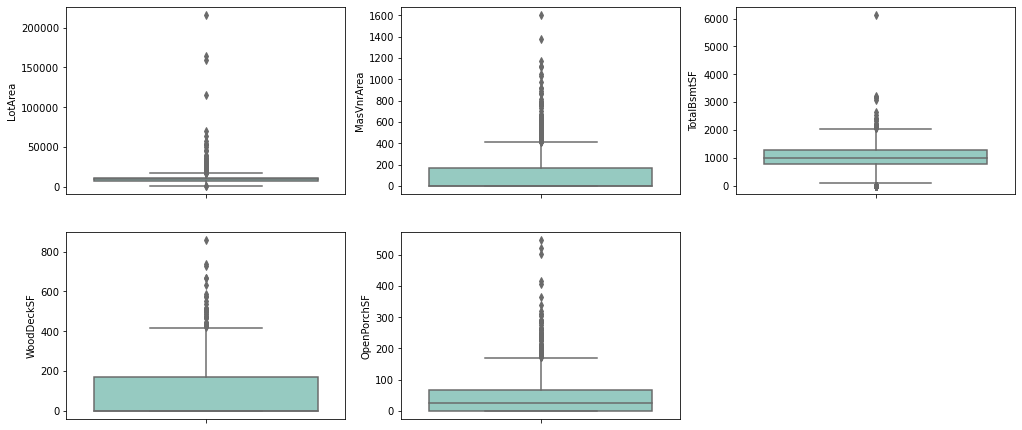

In [46]:
# Let us visualize the outliers for all numeric columns 

plt.figure(figsize=(17, 20))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea', palette='Set3', data = house)
plt.subplot(5,3,2)
sns.boxplot(y = 'MasVnrArea', palette='Set3', data = house)
plt.subplot(5,3,3)
sns.boxplot(y = 'TotalBsmtSF', palette='Set3', data = house)
plt.subplot(5,3,4)
sns.boxplot(y = 'WoodDeckSF', palette='Set3', data = house)
plt.subplot(5,3,5)
sns.boxplot(y = 'OpenPorchSF', palette='Set3', data = house)
plt.show()


In [47]:
# Let us remove the outliers that axist beyond the 98th percentile 

# Removing values beyond 98% for LotArea

nn_quartile_LotArea = house['LotArea'].quantile(0.98)
house = house[house["LotArea"] < nn_quartile_LotArea]

# Removing values beyond 98% for MasVnrArea

nn_quartile_MasVnrArea = house['MasVnrArea'].quantile(0.98)
house = house[house["MasVnrArea"] < nn_quartile_MasVnrArea]

# Removing values beyond 99% for TotalBsmtSF

nn_quartile_TotalBsmtSF = house['TotalBsmtSF'].quantile(0.99)
house = house[house["TotalBsmtSF"] < nn_quartile_TotalBsmtSF]

# Removing values beyond 99% for WoodDeckSF

nn_quartile_WoodDeckSF = house['WoodDeckSF'].quantile(0.99)
house = house[house["WoodDeckSF"] < nn_quartile_WoodDeckSF]

# Removing values beyond 99% for OpenPorchSF

nn_quartile_OpenPorchSF = house['OpenPorchSF'].quantile(0.99)
house = house[house["OpenPorchSF"] < nn_quartile_OpenPorchSF]

In [48]:
# Finally, let us check the percentage of data retained after checking for missing, duplicate and outlier values 

num_data = round(100*(len(house)/1460),2)
print(num_data)

93.01


In [ ]:
# We have put the data through missing values, duplicate values and outlier treatments and refined it
# Let us put this refined data for Exploratory Data Analysis(EDA)

# Step 3: Exploratory Data Analysis (EDA)

In [49]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,2,548,0,61,None,Normal,208500,0,5,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,2,460,298,0,None,Normal,181500,0,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,2,608,0,42,None,Normal,223500,1,6,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,3,642,0,35,None,Abnorml,140000,1,36,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,3,836,192,84,None,Normal,250000,0,8,1


In [52]:
house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'Fence', 'SaleCondition', 'SalePrice',
       'IsRemodelled', 'BuiltOrRemodelAge', 'OldOrNewGarage'],
      dtype='object')

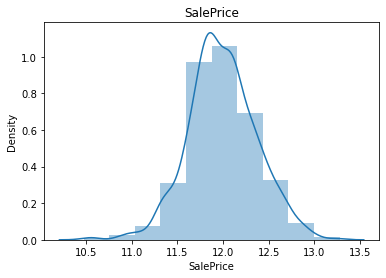

In [53]:
# Let us visualize the target variable SalesPrice and transform it 

house['SalePrice'] = np.log1p(house['SalePrice'])

plt.title('SalePrice')
sns.distplot(house['SalePrice'], bins=10)
plt.show()



<Figure size 720x360 with 0 Axes>

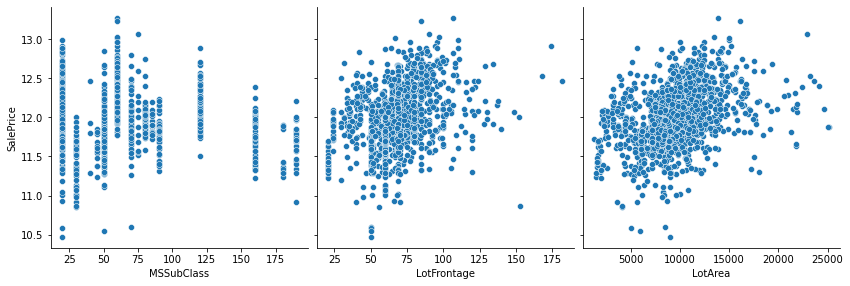

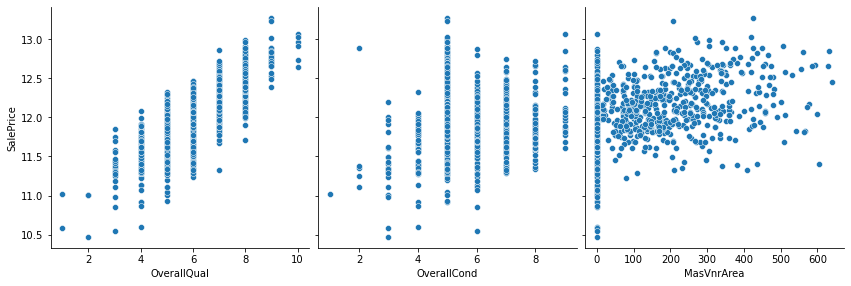

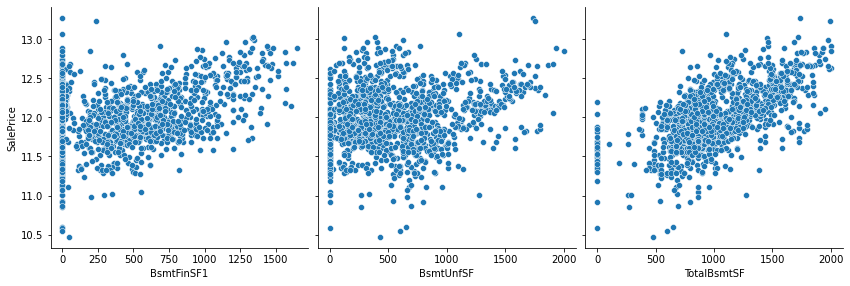

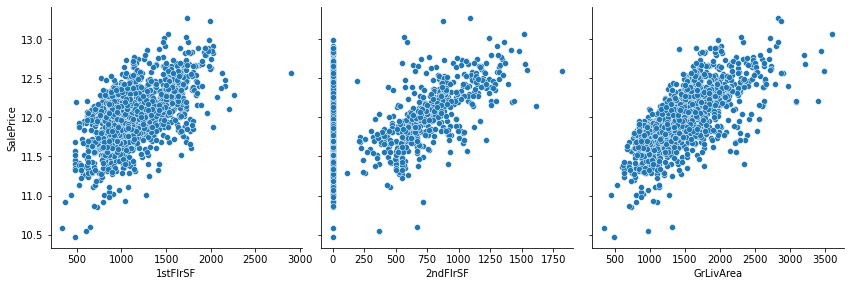

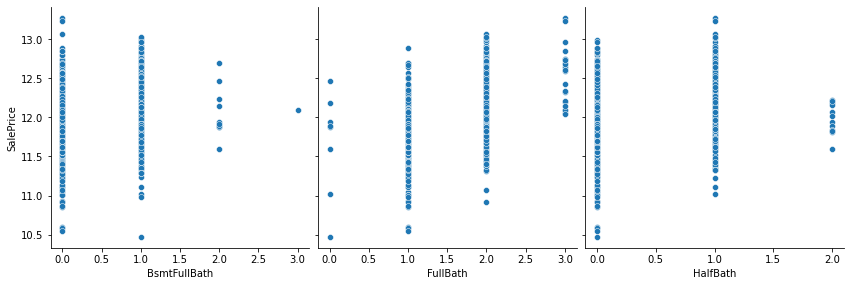

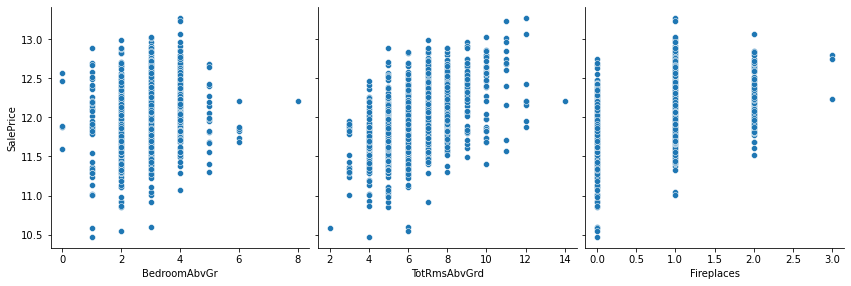

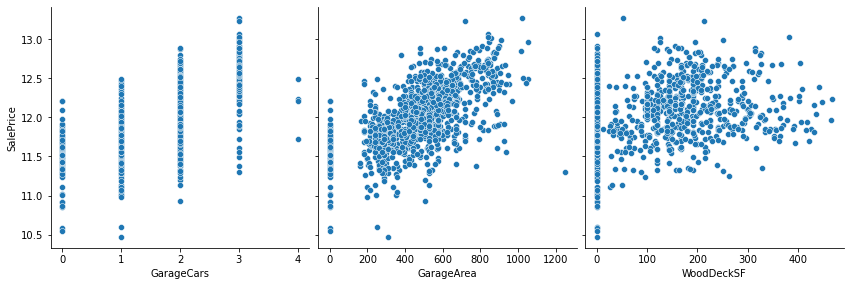

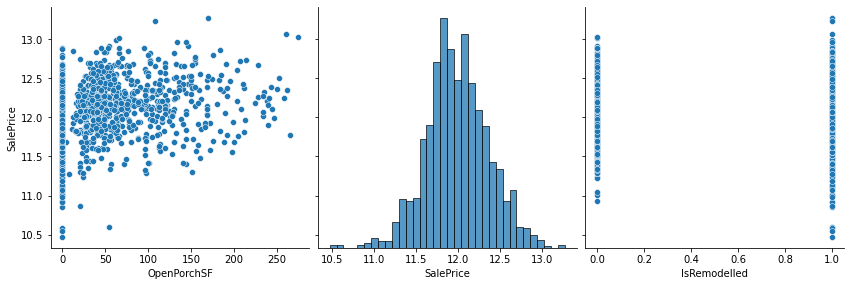

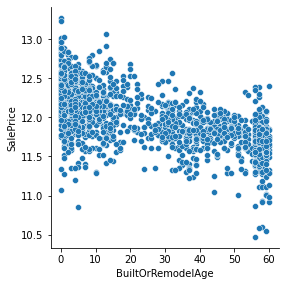

In [54]:
# Visualizing the numerical values using pairplots containing scatterplots 

plt.figure(figsize=(10,5))
sns.pairplot(house, x_vars=['MSSubClass','LotFrontage','LotArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house, x_vars=['OverallQual', 'OverallCond','MasVnrArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house, x_vars=['BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house, x_vars=['1stFlrSF','2ndFlrSF', 'GrLivArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house, x_vars=['BsmtFullBath','FullBath', 'HalfBath'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house, x_vars=['BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house, x_vars=['GarageCars','GarageArea', 'WoodDeckSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house, x_vars=['OpenPorchSF','SalePrice', 'IsRemodelled'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house, x_vars=['BuiltOrRemodelAge'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
plt.show()

In [ ]:
# Observation 

# 1stFlrSf, 2nFlrSf, GrLivArea shows a positive correlation with Sales Price
# The remaining variables are too scattered and we can find in the further analysis

In [61]:
# Correlation matrix 

cor = house.corr()
cor

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
Id,1.000000,0.011880,-0.021860,-0.007403,-0.022829,0.011214,-0.039100,-0.013113,-0.007546,-0.020687,...,-0.000394,0.016598,-0.009454,0.016031,-0.040778,-0.037938,-0.015771,0.010197,0.010050,0.014642
MSSubClass,0.011880,1.000000,-0.401931,-0.393699,0.060222,-0.059830,0.024548,-0.071873,-0.129118,-0.245604,...,0.187404,-0.032854,-0.031299,-0.040892,-0.030496,0.004843,-0.059653,-0.047843,-0.048133,0.040748
LotFrontage,-0.021860,-0.401931,1.000000,0.570154,0.190775,-0.051785,0.162426,0.107511,0.141324,0.288790,...,0.040485,0.256733,0.203051,0.272192,0.079295,0.134818,0.340837,-0.046754,-0.065145,0.078414
LotArea,-0.007403,-0.393699,0.570154,1.000000,0.171768,-0.005919,0.096369,0.142376,0.092427,0.287169,...,0.092749,0.285788,0.308544,0.258948,0.136089,0.133542,0.380824,0.002721,-0.039391,-0.017580
OverallQual,-0.022829,0.060222,0.190775,0.171768,1.000000,-0.088590,0.366129,0.193002,0.285256,0.507715,...,0.246581,0.109499,0.377691,0.586480,0.219328,0.358891,0.813190,-0.100826,-0.548074,0.563296
OverallCond,0.011214,-0.059830,-0.051785,-0.005919,-0.088590,1.000000,-0.125851,-0.017521,-0.143153,-0.162739,...,-0.050472,0.014373,-0.011391,-0.177895,0.003890,-0.055243,-0.024053,0.317140,-0.073388,-0.290144
MasVnrArea,-0.039100,0.024548,0.162426,0.096369,0.366129,-0.125851,1.000000,0.213629,0.086560,0.307658,...,0.162853,0.119338,0.224874,0.336142,0.123847,0.164114,0.380392,-0.162473,-0.142217,0.165754
BsmtFinSF1,-0.013113,-0.071873,0.107511,0.142376,0.193002,-0.017521,0.213629,1.000000,-0.558481,0.427601,...,-0.031305,-0.118604,0.204278,0.189729,0.195079,0.064733,0.352239,-0.126288,-0.121970,0.011541
BsmtUnfSF,-0.007546,-0.129118,0.141324,0.092427,0.285256,-0.143153,0.086560,-0.558481,1.000000,0.437582,...,-0.062549,0.161291,0.039859,0.204051,-0.040374,0.137854,0.203529,0.031564,-0.174480,0.335792
TotalBsmtSF,-0.020687,-0.245604,0.288790,0.287169,0.507715,-0.162739,0.307658,0.427601,0.437582,1.000000,...,-0.113918,0.050113,0.277055,0.421145,0.202218,0.224610,0.611669,-0.110048,-0.303012,0.329473


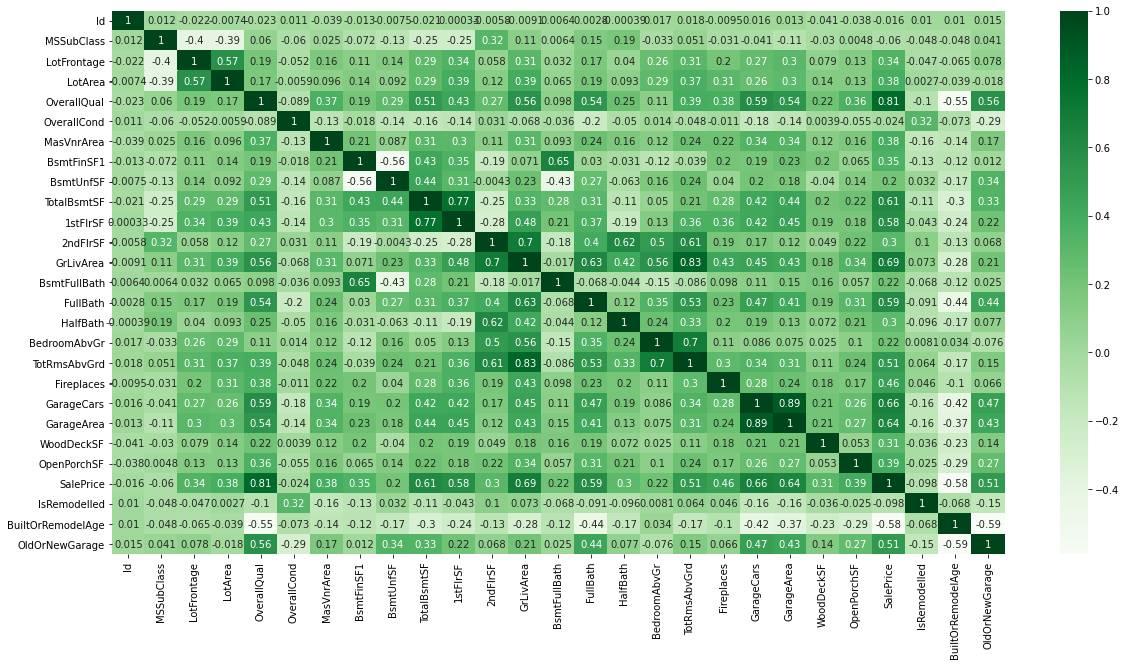

In [55]:
# Let us check the correlation of numerical values with a heatmap 

plt.figure(figsize = (20, 10))
sns.heatmap(house.corr(), annot = True, cmap="Greens")
plt.show()

In [ ]:
# Observation

# TotRmsAbvGrd and GrLivArea has 83% correlation
# GarageArea and GarageCars show 89% correlation 

In [56]:
# Let us drop the highly correlated variables 

house.drop(['TotRmsAbvGrd', 'GarageArea'], axis = 1, inplace = True)

In [57]:
# Let us check the shape of house data

house.shape

(1358, 47)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'CollgCr'),
  Text(1, 0, 'Veenker'),
  Text(2, 0, 'Crawfor'),
  Text(3, 0, 'NoRidge'),
  Text(4, 0, 'Mitchel'),
  Text(5, 0, 'Somerst'),
  Text(6, 0, 'NWAmes'),
  Text(7, 0, 'OldTown'),
  Text(8, 0, 'BrkSide'),
  Text(9, 0, 'Sawyer'),
  Text(10, 0, 'NridgHt'),
  Text(11, 0, 'NAmes'),
  Text(12, 0, 'SawyerW'),
  Text(13, 0, 'IDOTRR'),
  Text(14, 0, 'MeadowV'),
  Text(15, 0, 'Edwards'),
  Text(16, 0, 'Timber'),
  Text(17, 0, 'Gilbert'),
  Text(18, 0, 'ClearCr'),
  Text(19, 0, 'NPkVill'),
  Text(20, 0, 'StoneBr'),
  Text(21, 0, 'Blmngtn'),
  Text(22, 0, 'BrDale'),
  Text(23, 0, 'SWISU'),
  Text(24, 0, 'Blueste')])

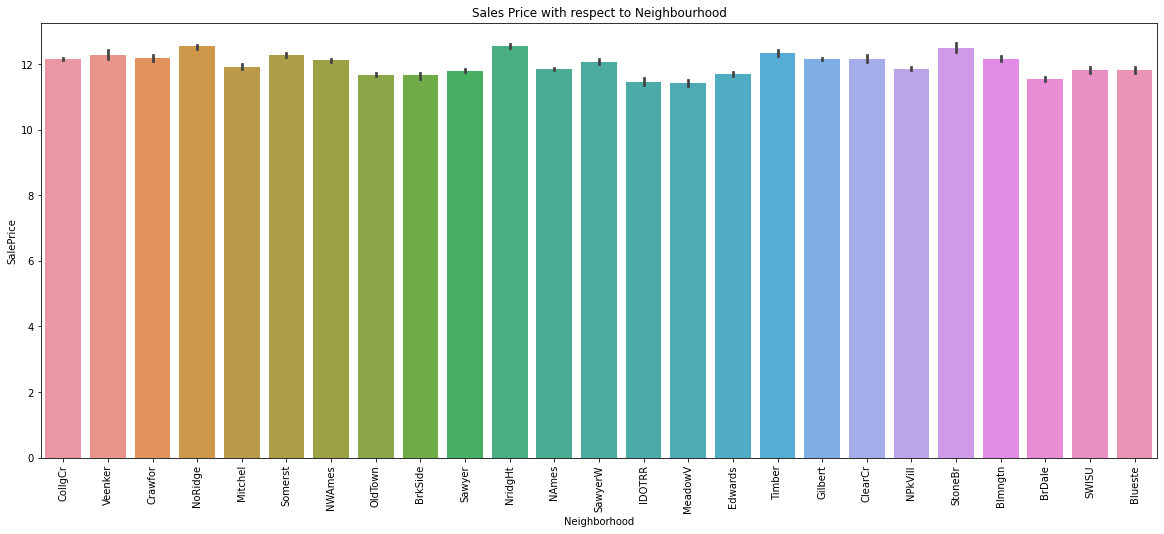

In [58]:
# Let us plot a bar graph with respect to properties and neighbourhood 

plt.figure(figsize=(20, 8))
sns.barplot(x="Neighborhood", y="SalePrice", data= house)
plt.title("Sales Price with respect to Neighbourhood")
plt.xticks(rotation=90)

In [ ]:
# The sales price of some neibourhoods are quite high. 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9')])

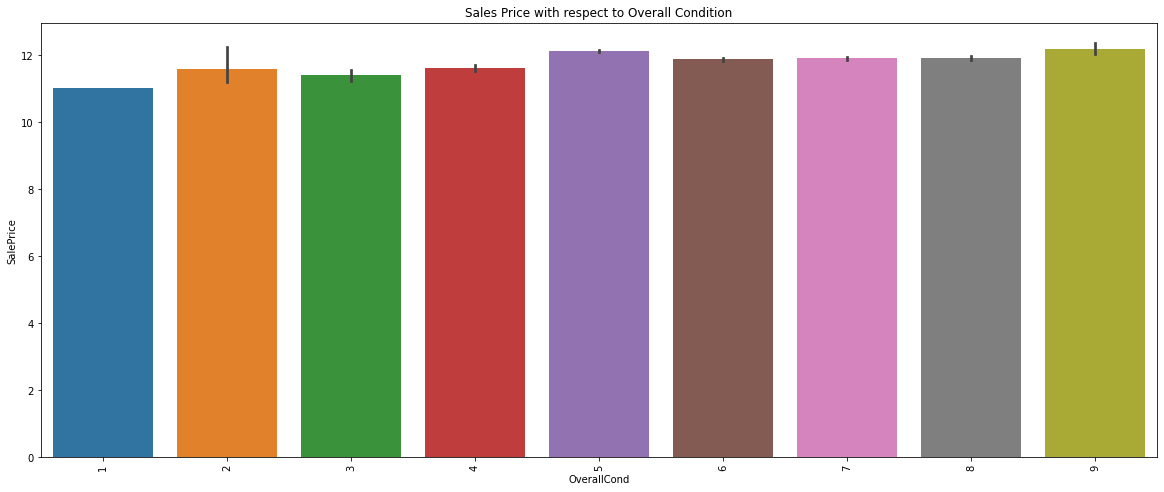

In [59]:
# Let us plot overall condition and sales price

plt.figure(figsize=(20, 8))
sns.barplot(x="OverallCond", y="SalePrice", data= house)
plt.title("Sales Price with respect to Overall Condition")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10')])

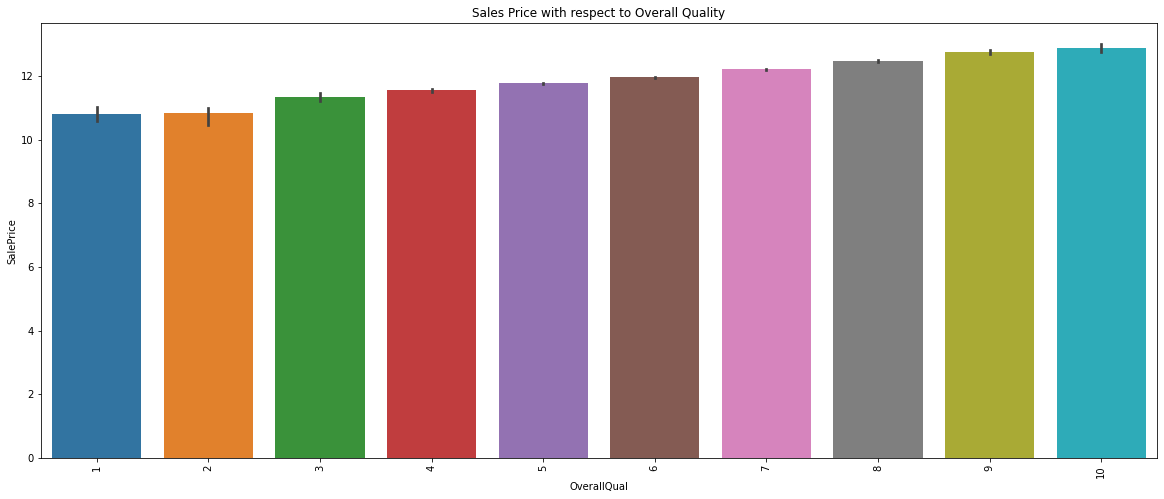

In [60]:
# We will plot overall quality and salesprice 

plt.figure(figsize=(20, 8))
sns.barplot(x="OverallQual", y="SalePrice", data= house)
plt.title("Sales Price with respect to Overall Quality")
plt.xticks(rotation=90)

In [ ]:
# We can understand that increase in overall quality leads to an increase in sales price 

In [64]:
# Let us explore the distribution of numerical columns and categorical columns  

house_num = house.select_dtypes(include=['int64', 'float64'])
house_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
0,1,60,65.0,8450,7,5,196.0,706,150,856,...,1,3,0,2,0,61,12.247699,0,5,1
1,2,20,80.0,9600,6,8,0.0,978,284,1262,...,0,3,1,2,298,0,12.109016,0,31,0
2,3,60,68.0,11250,7,5,162.0,486,434,920,...,1,3,1,2,0,42,12.317171,1,6,1
3,4,70,60.0,9550,7,5,0.0,216,540,756,...,0,3,1,3,0,35,11.849405,1,36,0
4,5,60,84.0,14260,8,5,350.0,655,490,1145,...,1,4,1,3,192,84,12.429220,0,8,1


In [65]:
## Let us extract categorical columns
house_cat = house.select_dtypes(include='object')
house_cat.head()

,MSZoning,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,...,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,FireplaceQu,GarageType,GarageFinish,Fence,SaleCondition
0,RL,Reg,Inside,CollgCr,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,...,Gd,No,GLQ,Ex,Gd,None,Attchd,RFn,None,Normal
1,RL,Reg,FR2,Veenker,1Fam,1Story,Gable,MetalSd,MetalSd,None,...,Gd,Gd,ALQ,Ex,TA,TA,Attchd,RFn,None,Normal
2,RL,IR1,Inside,CollgCr,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,...,Gd,Mn,GLQ,Ex,Gd,TA,Attchd,RFn,None,Normal
3,RL,IR1,Corner,Crawfor,1Fam,2Story,Gable,Wd Sdng,Wd Shng,None,...,TA,No,ALQ,Gd,Gd,Gd,Detchd,Unf,None,Abnorml
4,RL,IR1,FR2,NoRidge,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,...,Gd,Av,GLQ,Ex,Gd,TA,Attchd,RFn,None,Normal


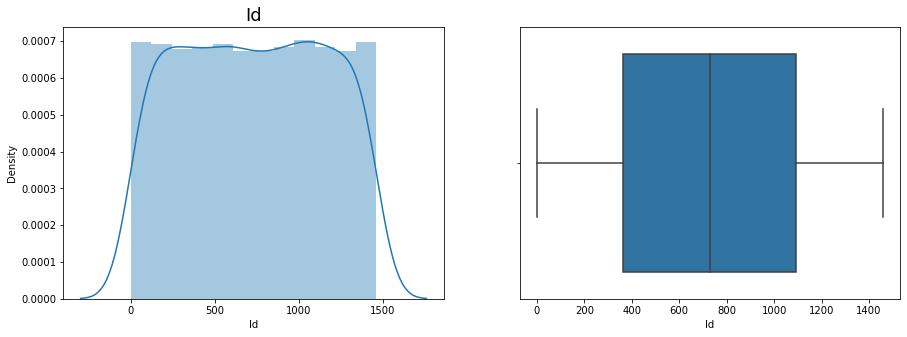

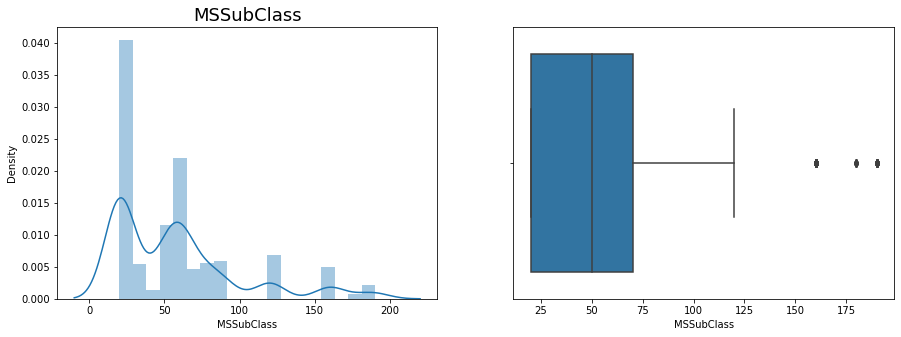

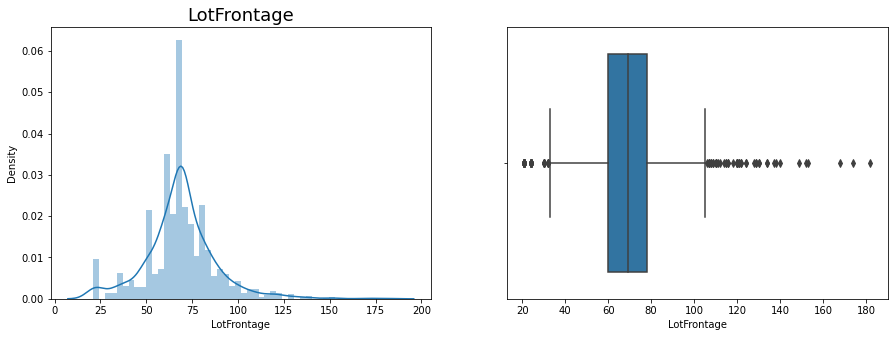

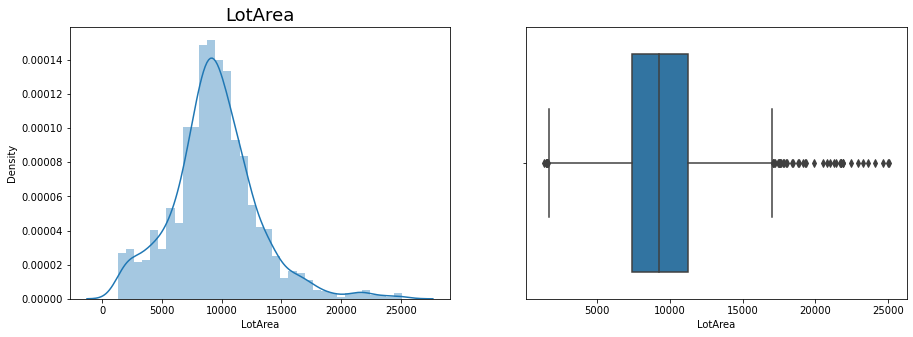

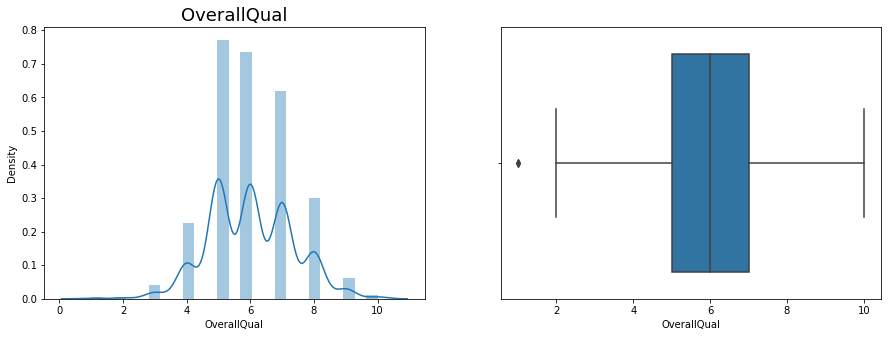

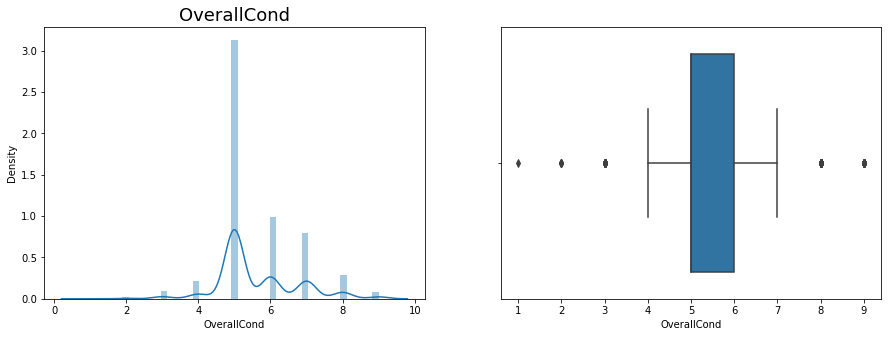

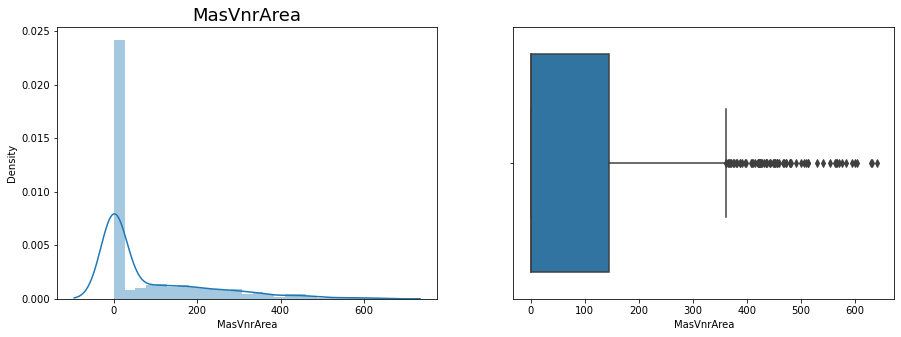

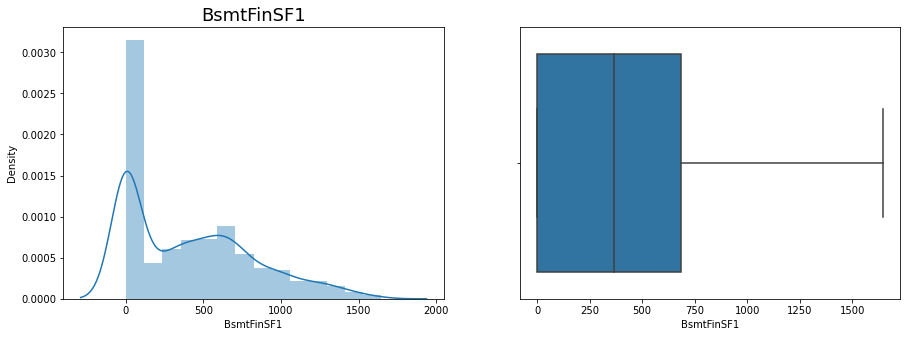

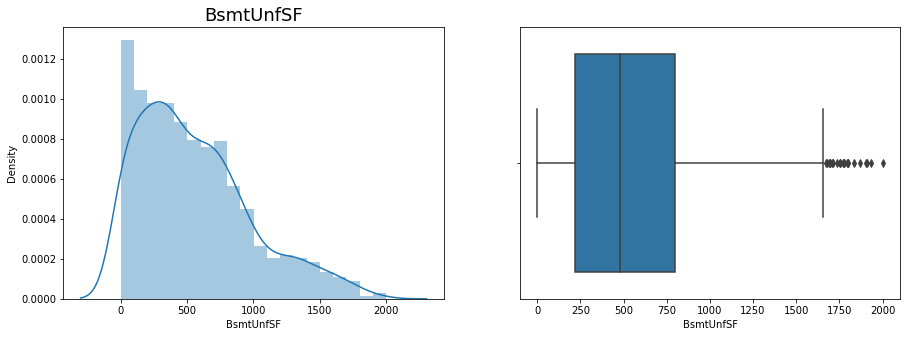

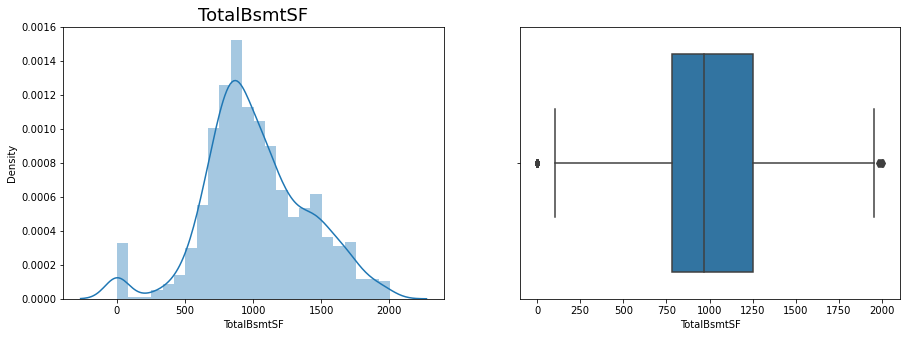

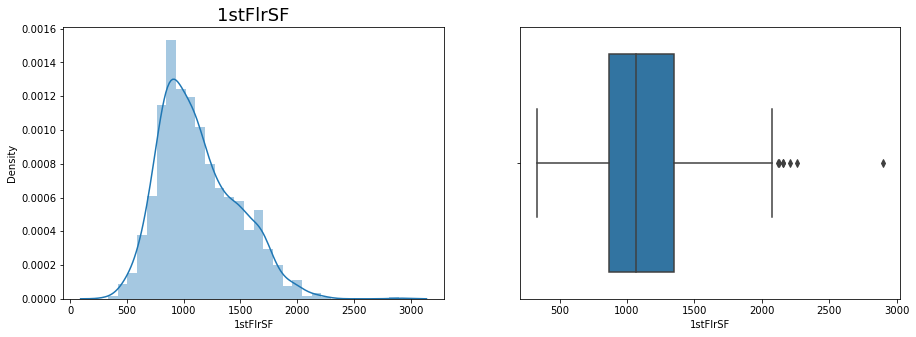

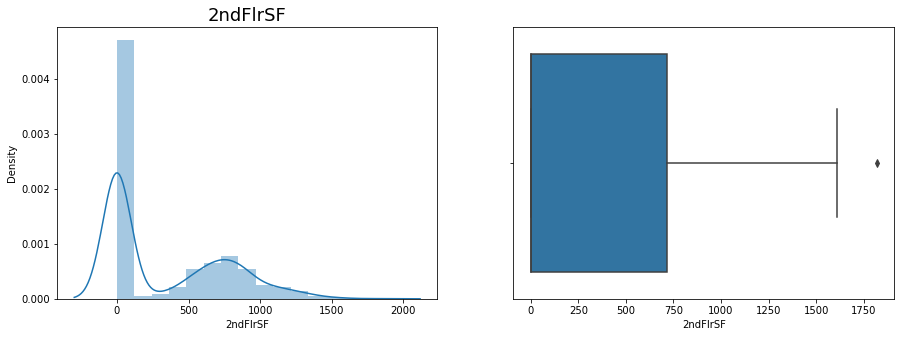

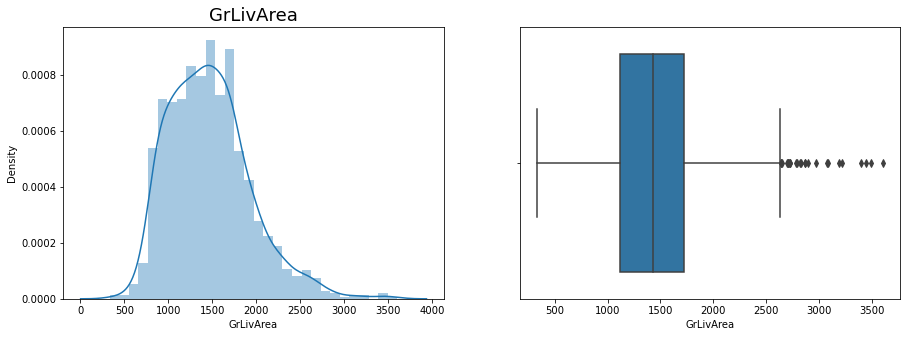

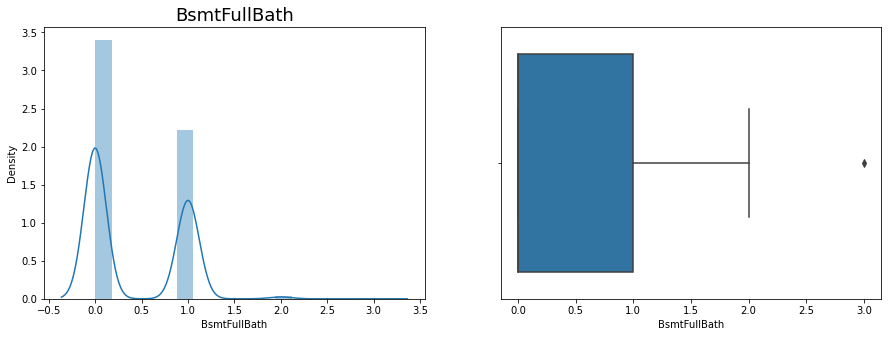

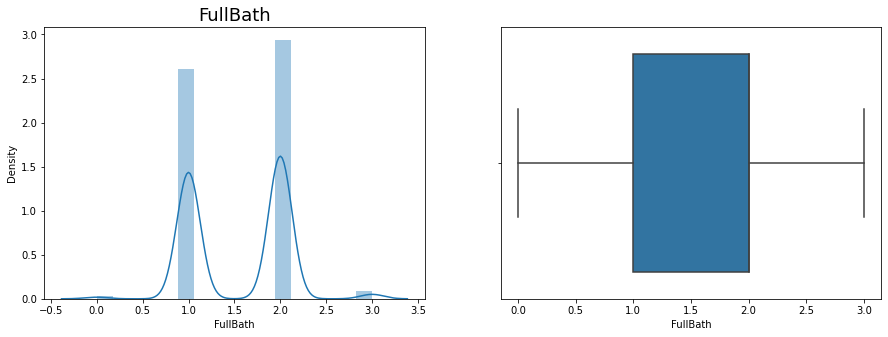

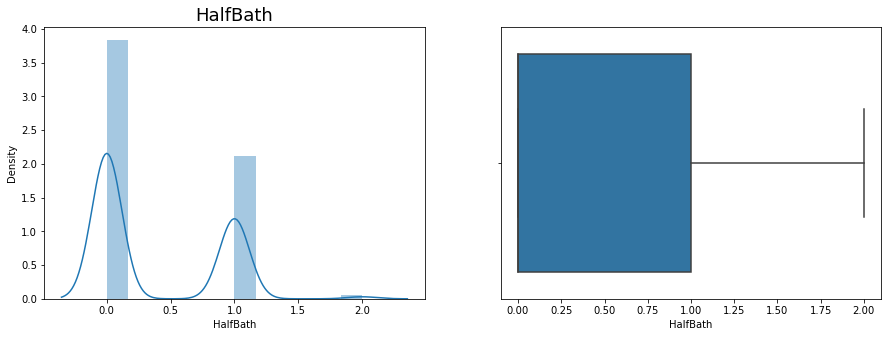

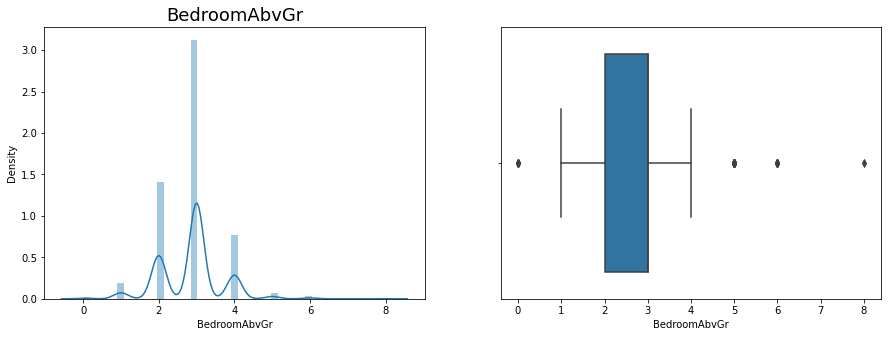

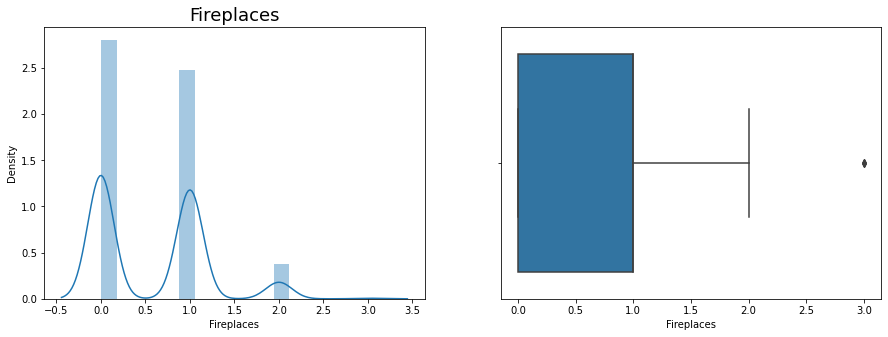

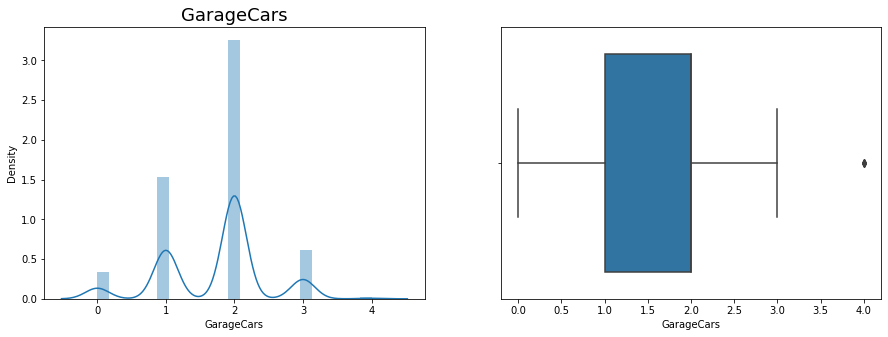

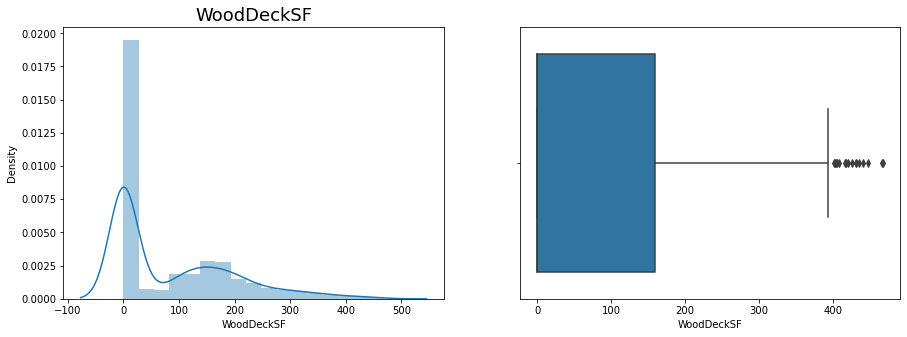

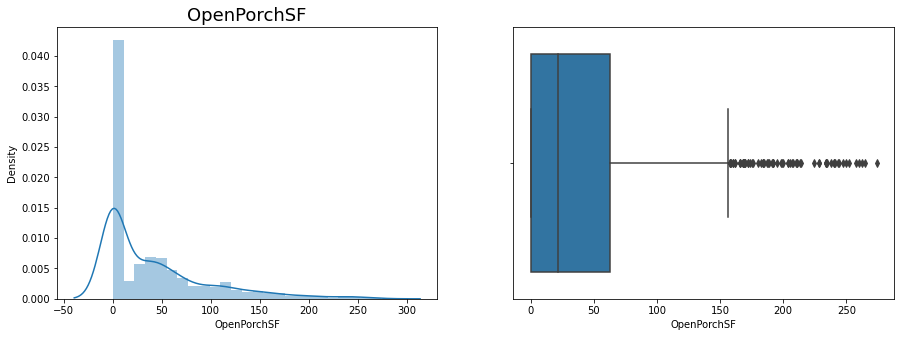

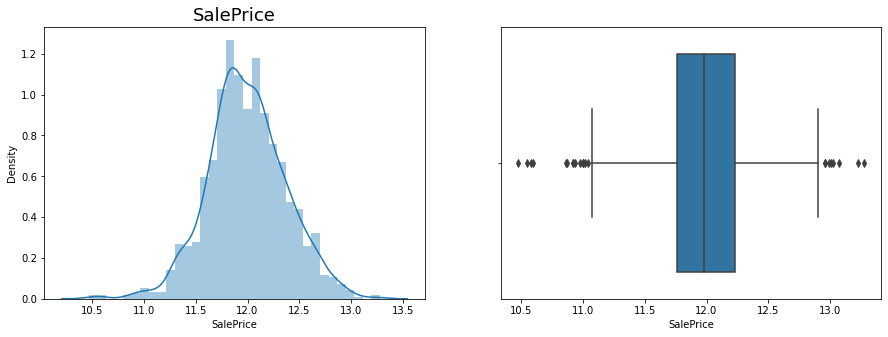

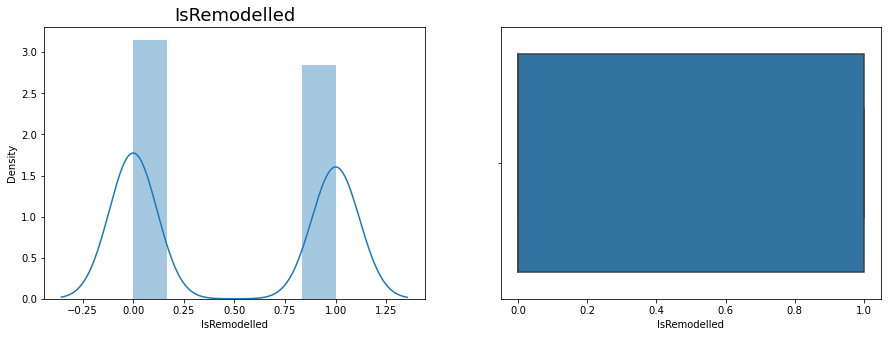

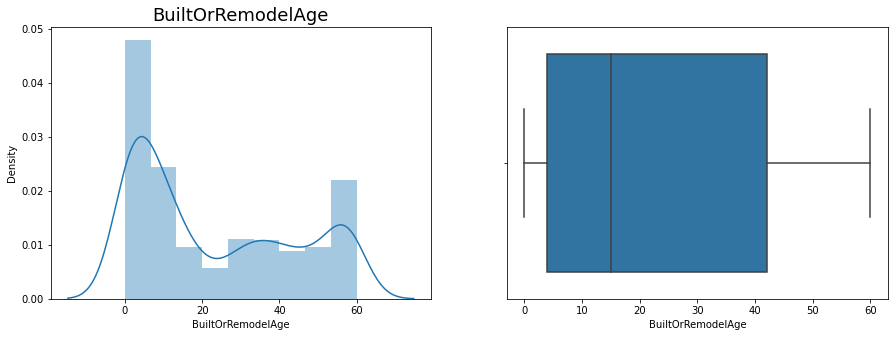

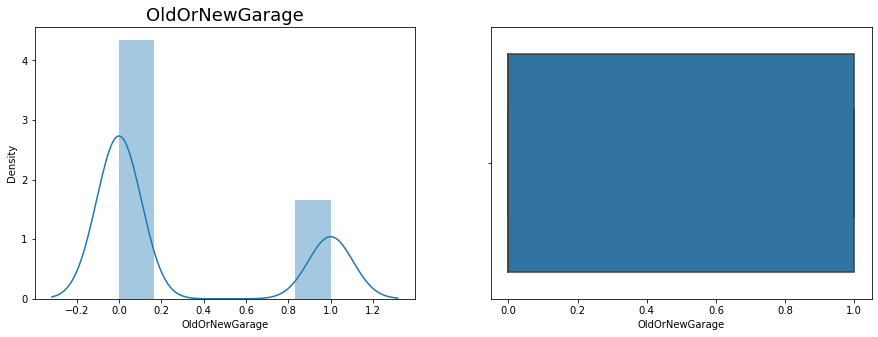

In [66]:
# Let us check the distribution of all numeric variables using histograms and barplots 

for col in house_num.columns:
    plt.figure(figsize=(15,5))
    
    plt.subplot(1,2,1)
    plt.title(col, fontdict={'fontsize': 18})
    sns.distplot(house_num[col])
    
    plt.subplot(1,2,2)
    sns.boxplot(house_num[col])
    plt.show()    

In [ ]:
# Most numerical columns in this house dataset has non-normal distribution 

In [67]:
# Let us view unique values of categorical columns 

for col in house_cat.columns:
    print(col)
    print(house[col].unique(), '\n')

MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH'] 

LotShape
['Reg' 'IR1' 'IR2' 'IR3'] 

LotConfig
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3'] 

Neighborhood
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'ClearCr' 'NPkVill' 'StoneBr'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste'] 

BldgType
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs'] 

HouseStyle
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin'] 

RoofStyle
['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed'] 

Exterior1st
['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock'] 

Exterior2nd
['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Other'
 'Stone' 'CBlock'] 

MasVnrType
['BrkFace' 'None' 'Stone' 'BrkCmn'] 

ExterQual
['Gd' 'T

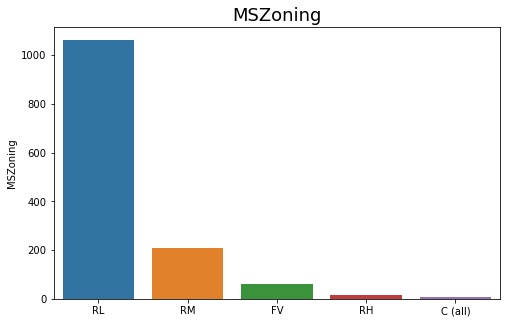

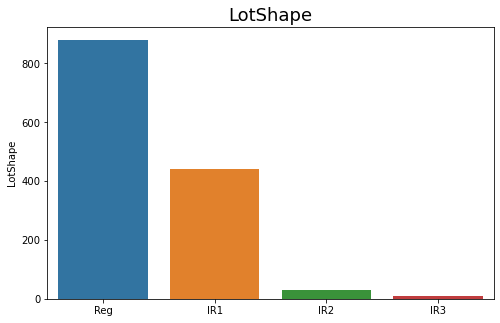

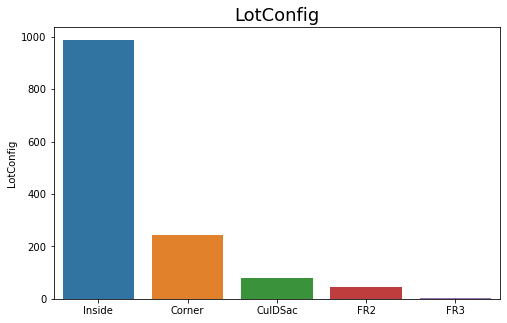

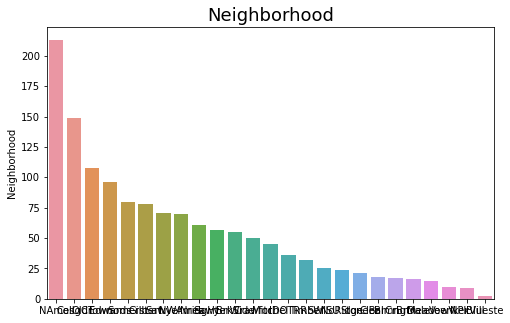

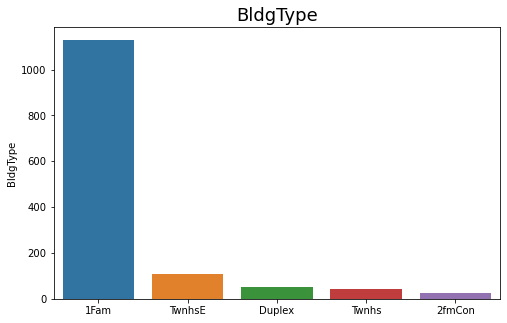

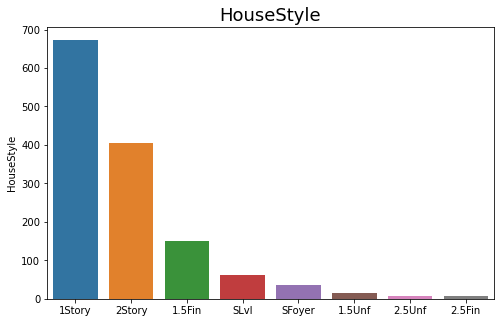

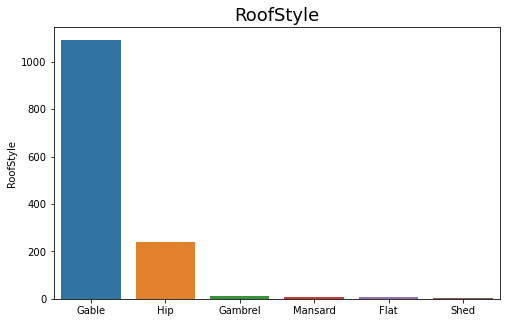

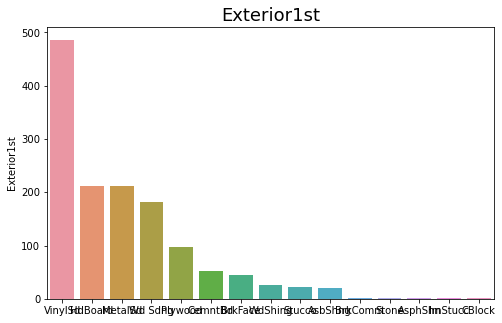

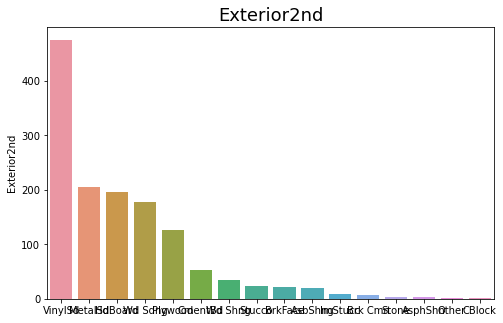

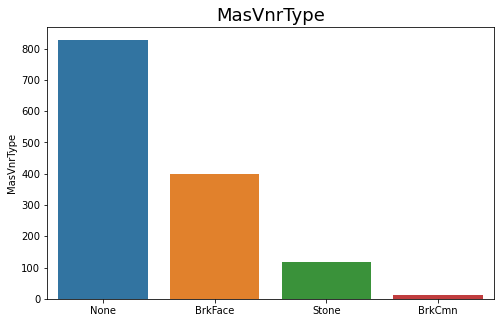

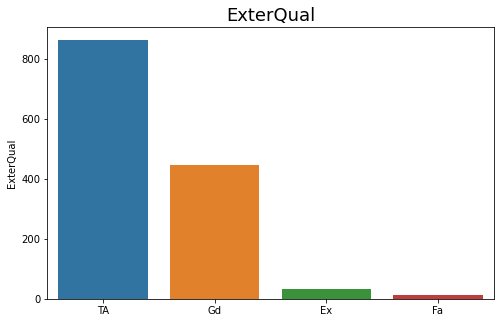

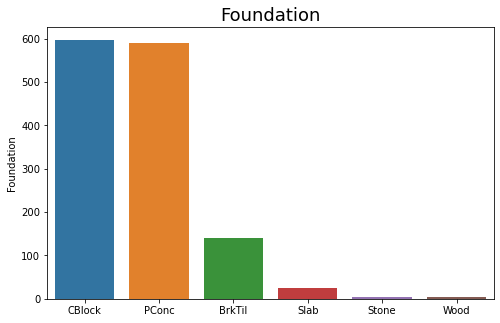

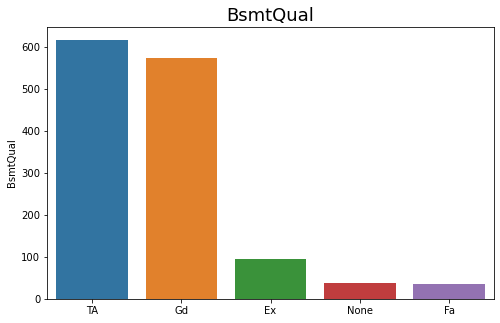

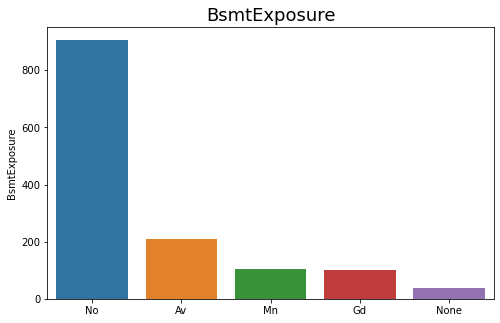

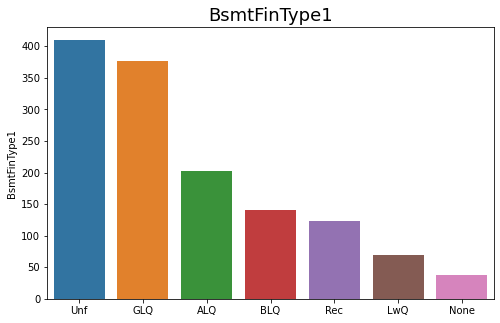

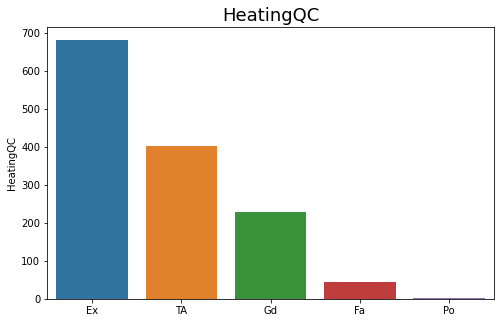

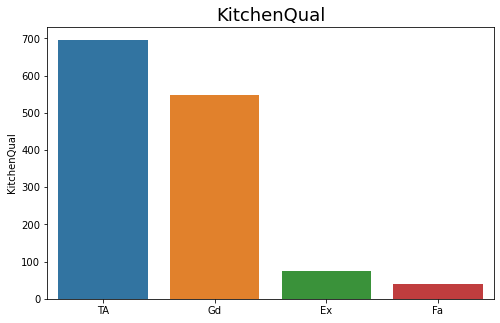

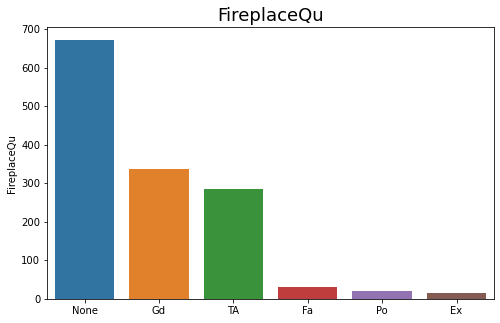

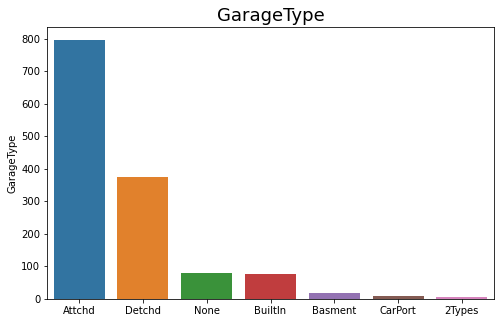

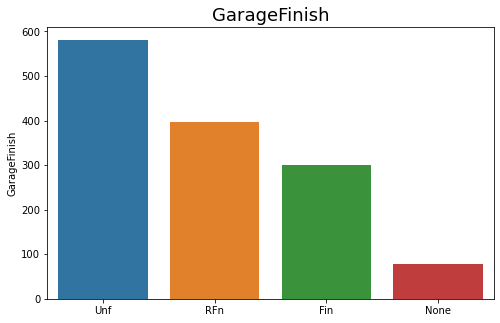

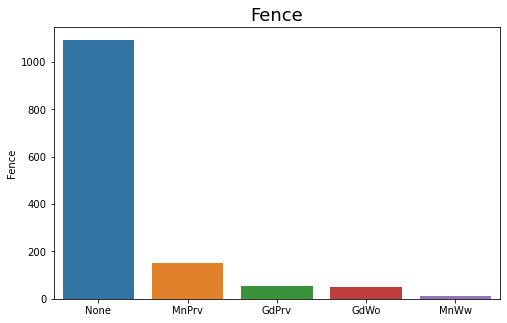

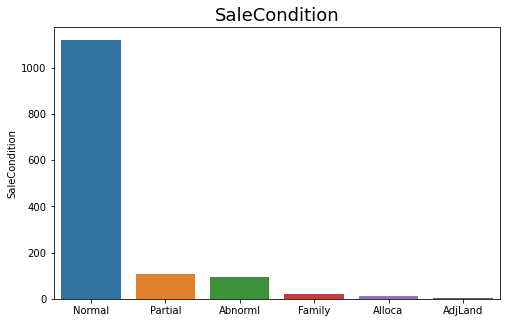

In [68]:
# Let us visualize categorical columns with barplots 

for col in house_cat.columns:
    plt.figure(figsize=(8,5))
    plt.title(col, fontdict={'fontsize': 18})
    sns.barplot(house_cat[col].value_counts().index, house_cat[col].value_counts())
    plt.show()

# Step 4: Data Preparation 

In [69]:
# Let us create dummy variables for columns having more than two categories 
# For variables that have ordered sequence value we have given ordered sequence value
# For variables that could not be ordered, we have given 0 and 1

house['d_LotShape'] = house['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
house['d_ExterQual'] = house['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
house['d_BsmtQual'] = house['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
house['d_BsmtExposure'] = house['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
house['d_BsmtFinType1'] = house['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 
                                                                 'None': 0})
house['d_HeatingQC'] = house['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
house['d_KitchenQual'] = house['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
house['d_FireplaceQu'] = house['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
house['d_GarageFinish'] = house['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
house['d_BldgType'] = house['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 
                                                                 'None': 0 })
house['d_HouseStyle'] = house['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, 
                                                                 '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })
house['d_Fence'] = house['Fence'].map({'GdPrv': 4, 'GdWo': 3, 'MnPrv': 2, 'MnWw': 1, 'None': 0 })
house['d_LotConfig'] = house['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1, 
                                                           'None': 0  })
house['d_MasVnrType'] = house['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })
house['d_SaleCondition'] = house['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0, 
                                                                   'Alloca': 0, 'AdjLand': 0, 'None': 0})
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,5,4,0,2,1,4,0,5,1,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,5,3,3,2,1,1,0,2,0,1
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,5,4,3,2,1,4,0,5,1,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,4,4,4,1,1,4,0,4,0,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,5,4,3,2,1,4,0,2,1,1


In [70]:
# Now let us drop the old columns from which we have derived the new columns 
#Let us add ID column as it may not be of any use 


house = house.drop(['Id', 'LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 
                                'KitchenQual', 'FireplaceQu', 'GarageFinish', 'BldgType', 'HouseStyle', 'Fence', 
                                'LotConfig', 'MasVnrType', 'SaleCondition'], axis=1)

house.head()



,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,...,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,...,5,4,0,2,1,4,0,5,1,1
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,...,5,3,3,2,1,1,0,2,0,1
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,...,5,4,3,2,1,4,0,5,1,1
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,...,4,4,4,1,1,4,0,4,0,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,...,5,4,3,2,1,4,0,2,1,1


In [71]:
# Let us create dummies for these following columns 

# Creating dummies for MSZoning

d_MSZoning = pd.get_dummies(house['MSZoning'], prefix='MSZoning', drop_first = True)
house = pd.concat([house, d_MSZoning], axis = 1)

# Creating dummies for Neighborhood

d_Neighborhood = pd.get_dummies(house['Neighborhood'], prefix='Neighborhood', drop_first = True)
house = pd.concat([house, d_Neighborhood], axis = 1)

# Creating dummies for RoofStyle

d_RoofStyle = pd.get_dummies(house['RoofStyle'], prefix='RoofStyle', drop_first = True)
house = pd.concat([house, d_RoofStyle], axis = 1)

# Creating dummies for Exterior1st

d_Exterior1st = pd.get_dummies(house['Exterior1st'], prefix='Exterior1st', drop_first = True)
house = pd.concat([house, d_Exterior1st], axis = 1)

# Creating dummies for Exterior2nd

d_Exterior2nd = pd.get_dummies(house['Exterior2nd'], prefix='Exterior2nd', drop_first = True)
house = pd.concat([house, d_Exterior2nd], axis = 1)

# Creating dummies for Foundation

d_Foundation = pd.get_dummies(house['Foundation'], prefix='Foundation', drop_first = True)
house = pd.concat([house, d_Foundation], axis = 1)

# Creating dummies for GarageType

d_GarageType = pd.get_dummies(house['GarageType'], prefix='GarageType', drop_first = True)
house = pd.concat([house, d_GarageType], axis = 1)

house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,...,0,0,0,0,1,0,0,0,0,0
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,...,0,0,0,0,0,0,0,0,1,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0


In [72]:
# Let us drop the columns for which we have derived dummy values 

house = house.drop(['MSZoning', 'Neighborhood', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', 
                                'GarageType'], axis=1)

house.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,65.0,8450,7,5,196.0,706,150,856,856,...,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,...,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,434,920,920,...,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,...,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,...,1,0,0,0,1,0,0,0,0,0


In [73]:
# let us find the basic information of the house dataset again 

house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1358 entries, 0 to 1458
Columns: 112 entries, MSSubClass to GarageType_None
dtypes: float64(3), int64(36), uint8(73)
memory usage: 553.5 KB


In [ ]:
# Now all the columns have been transformed into numeric 

# Step 5: Model building and evaluation 

In [74]:
# Adding all feature variables to X 

X = house.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,65.0,8450,7,5,196.0,706,150,856,856,...,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,...,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,434,920,920,...,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,...,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,...,1,0,0,0,1,0,0,0,0,0


In [75]:
# Adding response variable to y

y = house['SalePrice']
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [76]:
# Scaling the features 

from sklearn.preprocessing import scale

# storing column names in cols
# scaling (the dataframe is converted to a numpy array)

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone',
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_None'],
      dtype='object', length=111)

In [79]:
# Let's do the train-test split 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=42)

In [80]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
328,1.486471,0.011754,-1.151909,0.740183,-0.526853,-0.625900,1.623717,-0.435595,1.152606,0.957298,...,1.142630,-0.134131,-0.060791,-0.047053,0.840256,-0.119121,-0.245172,-0.08168,-0.616507,-0.248530
1042,0.540313,0.835613,1.214461,-0.775908,0.365250,-0.625900,-1.013304,-0.058022,-1.283688,-0.312979,...,-0.875174,-0.134131,-0.060791,-0.047053,-1.190113,-0.119121,4.078770,-0.08168,-0.616507,-0.248530
318,-0.878923,-0.142719,0.820250,-0.017863,1.257352,0.687410,0.412442,0.168056,0.522348,0.257470,...,-0.875174,-0.134131,-0.060791,-0.047053,0.840256,-0.119121,-0.245172,-0.08168,-0.616507,-0.248530
1050,1.486471,-0.812105,-1.590935,0.740183,-0.526853,0.344158,-1.013304,1.899765,0.940755,1.257225,...,1.142630,-0.134131,-0.060791,-0.047053,0.840256,-0.119121,-0.245172,-0.08168,-0.616507,-0.248530
83,-0.169305,1.865437,-0.266941,-2.292000,-3.203159,-0.625900,-1.013304,1.060714,-0.012578,-0.336503,...,-0.875174,-0.134131,-0.060791,-0.047053,-1.190113,-0.119121,-0.245172,-0.08168,-0.616507,4.023664


In [82]:
# As there are 111 features, let us first do some recursive feature elimination
# Let us do RFE to get the 50 best variables 

# Running RFE with the output number of the variable equal to 50

from sklearn.feature_selection import RFE


lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, 50)            
rfe = rfe.fit(X_train, y_train)

In [83]:
# Assign the columns selected by RFE to cols

col = X_train.columns[rfe.support_]

# assign the 50 features selected using RFE to a dataframe and view them

temp_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
temp_df = temp_df.loc[temp_df['rfe_support'] == True]
temp_df.reset_index(drop=True, inplace=True)

temp_df

,Variable,rfe_support,rfe_ranking
0,MSSubClass,True,1
1,LotArea,True,1
2,OverallQual,True,1
3,OverallCond,True,1
4,BsmtFinSF1,True,1
5,TotalBsmtSF,True,1
6,GrLivArea,True,1
7,BsmtFullBath,True,1
8,FullBath,True,1
9,HalfBath,True,1


In [84]:
# Assign the 50 columns to X_train_rfe

X_train_rfe = X_train[col]

In [85]:
# Associate the new 50 columns to X_train and X_test for further analysis

X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

In [86]:
X_train.head()

,MSSubClass,LotArea,OverallQual,OverallCond,BsmtFinSF1,TotalBsmtSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,...,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,GarageType_CarPort
328,1.486471,-1.151909,0.740183,-0.526853,1.623717,1.152606,-0.033260,1.157858,-1.008133,1.258954,...,-0.201527,-0.4107,-0.134131,-0.733443,2.574726,-0.885717,1.142630,-0.134131,-0.060791,-0.08168
1042,0.540313,1.214461,-0.775908,0.365250,-1.013304,-1.283688,0.284106,-0.800263,-1.008133,-0.738312,...,-0.201527,-0.4107,-0.134131,-0.733443,-0.388391,1.129029,-0.875174,-0.134131,-0.060791,-0.08168
318,-0.878923,0.820250,-0.017863,1.257352,0.412442,0.522348,-0.543619,-0.800263,-1.008133,-0.738312,...,-0.201527,-0.4107,-0.134131,-0.733443,2.574726,1.129029,-0.875174,-0.134131,-0.060791,-0.08168
1050,1.486471,-1.590935,0.740183,-0.526853,-1.013304,0.940755,0.185465,-0.800263,0.841927,-0.738312,...,-0.201527,-0.4107,-0.134131,1.363432,-0.388391,-0.885717,1.142630,-0.134131,-0.060791,-0.08168
83,-0.169305,-0.266941,-2.292000,-3.203159,-1.013304,-0.012578,0.123279,-0.800263,-1.008133,-0.738312,...,-0.201527,-0.4107,-0.134131,-0.733443,-0.388391,1.129029,-0.875174,-0.134131,-0.060791,-0.08168


## Ridge Regression model 

In [87]:
# list pf alphas

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [88]:
# Printing the best hyperparameter alpha 

print(ridge_model_cv.best_params_)

{'alpha': 9.0}


In [89]:
#Fitting Ridge model for alpha = 9 and printing coefficients which have been penalised
alpha = 9
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-0.00489209  0.02265919  0.06856975  0.04548494  0.03282097  0.0483126
  0.10122171  0.01194917  0.01165228  0.01912558  0.02214819  0.03662631
  0.01039166 -0.01351653 -0.020056    0.01260477  0.01363608  0.01770606
  0.01725692  0.01638142  0.01493021 -0.0143559   0.01468146  0.0601006
  0.02345367  0.09132186  0.0626661   0.02576993 -0.0113843  -0.0085103
  0.02192487 -0.0147848  -0.00983069  0.01714535 -0.00978225 -0.01155976
 -0.00701566  0.01195118 -0.03802166 -0.03165379  0.00951623 -0.00571198
 -0.01679719  0.02959333  0.01867805  0.02084006  0.04181594  0.01854731
  0.00619079 -0.00945001]


In [97]:
# Let us put the features and coefficients in a table 

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient
0,MSSubClass,-0.0049
1,LotArea,0.0227
2,OverallQual,0.0686
3,OverallCond,0.0455
4,BsmtFinSF1,0.0328
5,TotalBsmtSF,0.0483
6,GrLivArea,0.1012
7,BsmtFullBath,0.0119
8,FullBath,0.0117
9,HalfBath,0.0191


In [104]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2_train_lr =", r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test_lr =", r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("rss1_lr =",rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("rss2_lr = ", rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("mse_train_lr = ", mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("mse_test_lr = ", mse_test_lr)
metric2.append(mse_test_lr**0.5)

r2_train_lr = 0.9188498883393994
r2_test_lr = 0.9018139885218929
rss1_lr = 10.846581643242931
rss2_lr =  5.573247337211768
mse_train_lr =  0.011417454361308348
mse_test_lr =  0.01365991994414649


In [ ]:
# The r-square (r2) score for train and test data of ridge regression is closer 

In [115]:
# Assign the Features and their coefficient values to a dictionary which would be used while plotting the bar plot

ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
ridge_coeff_dict

{'MSSubClass': -0.0049,
 'LotArea': 0.0227,
 'OverallQual': 0.0686,
 'OverallCond': 0.0455,
 'BsmtFinSF1': 0.0328,
 'TotalBsmtSF': 0.0483,
 'GrLivArea': 0.1012,
 'BsmtFullBath': 0.0119,
 'FullBath': 0.0117,
 'HalfBath': 0.0191,
 'Fireplaces': 0.0221,
 'GarageCars': 0.0366,
 'WoodDeckSF': 0.0104,
 'IsRemodelled': -0.0135,
 'BuiltOrRemodelAge': -0.0201,
 'OldOrNewGarage': 0.0126,
 'd_BsmtQual': 0.0136,
 'd_BsmtExposure': 0.0177,
 'd_HeatingQC': 0.0173,
 'd_KitchenQual': 0.0164,
 'd_GarageFinish': 0.0149,
 'd_BldgType': -0.0144,
 'd_SaleCondition': 0.0147,
 'MSZoning_FV': 0.0601,
 'MSZoning_RH': 0.0235,
 'MSZoning_RL': 0.0913,
 'MSZoning_RM': 0.0627,
 'Neighborhood_Crawfor': 0.0258,
 'Neighborhood_Edwards': -0.0114,
 'Neighborhood_MeadowV': -0.0085,
 'Neighborhood_NridgHt': 0.0219,
 'Neighborhood_OldTown': -0.0148,
 'Neighborhood_SWISU': -0.0098,
 'Neighborhood_StoneBr': 0.0171,
 'Exterior1st_BrkComm': -0.0098,
 'Exterior1st_CemntBd': -0.0116,
 'Exterior1st_Plywood': -0.007,
 'Exterior1st

#### Finding the top 10 variables that affect the Sales Price according to the Ridge regression model 

In [113]:
# Do an RFE to minimise the features to 15
X_train_ridge = X_train[ridge_df.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

# running RFE
rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_ridge, y_train)

In [116]:
# Method to get the coefficient values

def find(x):
    return ridge_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp1_df = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp1_df = temp1_df.loc[temp1_df['rfe_support'] == True]
temp1_df.reset_index(drop=True, inplace=True)

temp1_df['Coefficient'] = temp1_df['Features'].apply(find)
temp1_df = temp1_df.sort_values(by=['Coefficient'], ascending=False)
temp1_df = temp1_df.head(10)
temp1_df

,Features,rfe_support,rfe_ranking,Coefficient
5,GrLivArea,True,1,0.1012
10,MSZoning_RL,True,1,0.0913
1,OverallQual,True,1,0.0686
11,MSZoning_RM,True,1,0.0627
9,MSZoning_FV,True,1,0.0601
4,TotalBsmtSF,True,1,0.0483
2,OverallCond,True,1,0.0455
14,Foundation_PConc,True,1,0.0418
7,GarageCars,True,1,0.0366
3,BsmtFinSF1,True,1,0.0328


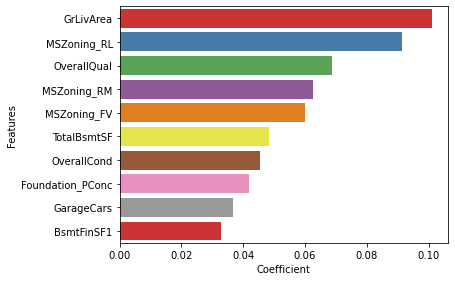

In [117]:
# Let us use the barplot to find the top 10 variables that affect the Sales price in ridge regression model 

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp1_df)
plt.show()


# We can find the top 10 variables that affect the Sales price in ridge regression model

- GrLivArea
- MSZoning_RL
- OverallQual
- MSZoning_RM
- MSZoning_FV
- TotalBsmtSF
- OverallCond
- Foundation_PConc
- GarageCars
- BsmtFinSF1

## Lasso Regression 

In [98]:
lasso = Lasso()

# cross validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [99]:
# Let us find the best hyperparameter alpha 

print(lasso_model_cv.best_params_)

{'alpha': 0.0001}


In [100]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [101]:
lasso.coef_

array([-0.00467379,  0.02270762,  0.06751179,  0.04498351,  0.03284734,
        0.04743462,  0.10403997,  0.01136556,  0.00993123,  0.01773821,
        0.02097512,  0.03713548,  0.01032839, -0.01254383, -0.01921895,
        0.01313728,  0.01419748,  0.01797265,  0.01728366,  0.01574953,
        0.01525405, -0.01490829,  0.01388681,  0.08051056,  0.03369896,
        0.13077116,  0.0978691 ,  0.0257648 , -0.011932  , -0.00840415,
        0.02269057, -0.01604439, -0.01036739,  0.01770224, -0.00992721,
       -0.01077671, -0.00693004,  0.0123378 , -0.04945976, -0.03403425,
        0.00813142, -0.00628679, -0.01747634,  0.04000585,  0.02063143,
        0.02263749,  0.04408554,  0.01854655,  0.00761662, -0.00862848])

In [105]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2_train_lr =", r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test_lr =", r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("rss1_lr =",rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("rss2_lr = ", rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("mse_train_lr = ", mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("mse_test_lr = ", mse_test_lr)
metric3.append(mse_test_lr**0.5)

r2_train_lr = 0.9195103567505184
r2_test_lr = 0.9019934232295361
rss1_lr = 10.758302965649161
rss2_lr =  5.563062240663679
mse_train_lr =  0.011324529437525432
mse_test_lr =  0.0136349564722149


In [ ]:
# The lasso regression has a close train and test r2 score. But it is not closer like ridge regression scores

In [111]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,MSSubClass,-0.0047
1,LotArea,0.0227
2,OverallQual,0.0675
3,OverallCond,0.0450
4,BsmtFinSF1,0.0328
5,TotalBsmtSF,0.0474
6,GrLivArea,0.1040
7,BsmtFullBath,0.0114
8,FullBath,0.0099
9,HalfBath,0.0177


In [118]:
# Put the Features and Coefficients in dictionary

lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'MSSubClass': -0.004673787797559965,
 'LotArea': 0.022707623848409377,
 'OverallQual': 0.0675117927352775,
 'OverallCond': 0.044983514453405024,
 'BsmtFinSF1': 0.03284733738134734,
 'TotalBsmtSF': 0.04743461504526044,
 'GrLivArea': 0.10403997499402311,
 'BsmtFullBath': 0.011365559971098607,
 'FullBath': 0.009931234202689583,
 'HalfBath': 0.017738210504766223,
 'Fireplaces': 0.02097512077914559,
 'GarageCars': 0.03713548438584083,
 'WoodDeckSF': 0.01032838778821452,
 'IsRemodelled': -0.012543832181563117,
 'BuiltOrRemodelAge': -0.019218949966382664,
 'OldOrNewGarage': 0.013137281198641786,
 'd_BsmtQual': 0.014197475099717098,
 'd_BsmtExposure': 0.01797264502106606,
 'd_HeatingQC': 0.017283664191575197,
 'd_KitchenQual': 0.015749530219226725,
 'd_GarageFinish': 0.015254046400511855,
 'd_BldgType': -0.014908294624237655,
 'd_SaleCondition': 0.013886808992799043,
 'MSZoning_FV': 0.08051056205497897,
 'MSZoning_RH': 0.033698958390151544,
 'MSZoning_RL': 0.13077116353773732,
 'MSZoning_RM':

In [119]:
# Do an RFE to minimise the features to 15

X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_lasso, y_train)

In [120]:
# Method to get the coefficient values

def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp2_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(find)
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df = temp2_df.head(10)
temp2_df

,Features,rfe_support,rfe_ranking,Coefficient
10,MSZoning_RL,True,1,0.130771
5,GrLivArea,True,1,0.104040
11,MSZoning_RM,True,1,0.097869
9,MSZoning_FV,True,1,0.080511
1,OverallQual,True,1,0.067512
4,TotalBsmtSF,True,1,0.047435
2,OverallCond,True,1,0.044984
14,Foundation_PConc,True,1,0.044086
7,GarageCars,True,1,0.037135
3,BsmtFinSF1,True,1,0.032847


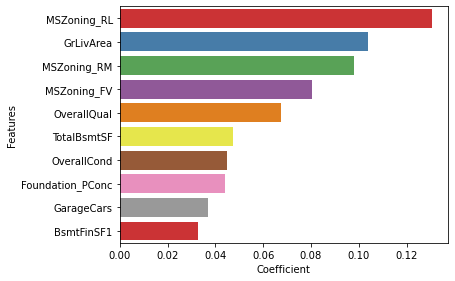

In [121]:
# Let us use barplot to visualize the top 10 variables the affect Sales price in Lasso regression model

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp2_df)
plt.show()

#  Top 10 variables affecting Sales prices of homes in Lasso Regression model 


- MSZoning_RL
- GrLivArea
- MSZoning_RM
- MSZoning_FV
- OverallQual
- TotalBsmtSF
- OverallCond
- Foundation_PConc
- GarageCars
- BsmtFinSF1

In [110]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)']}
lr_metric = pd.DataFrame(lr_table ,columns = ['Metric'])
rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric,rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.918850,0.919510
1,R2 Score (Test),0.901814,0.901993
2,RSS (Train),10.846582,10.758303
3,RSS (Test),5.573247,5.563062
4,MSE (Train),0.106852,0.106417
5,MSE (Test),0.116876,0.116769


## Conclusion

- The optimal value of ridge regression and lasso regression is given below 



              - Ridge regression: 9.0
              - Lasso regression: 0.0001



- The mean squared error for ridge and lasso train data 

               - Ridge regression: 0.106852
               - Lasso regression: 0.106417 
   
   
               - Ridge regression: 0.116876 (test)
               - Lasso regression: 0.116769 (test) 
   



- The Mean squared error of Lasso regression is lesser than ridge regression



- Lasso regression helps in feature reduction, hence Lasso has a better edge over the ridge regression 




- Based on Lasso Regression model, the factors that affect the Sales prices of houses in Australia are:



            - Zoning classification, 
            - Living area square feet 
            - Overall quality
            - Overall condition of the house 
            - Foundation type of the house
            - Number of cars that can be accomodated in the garage 
            - Total basement area in square feet 
            - Basement finished square feet area
            - General zoning residential medium density 
            - General Zoning floating village residential 
